# Machine Learning for Finance Project

This project, we will focus on 

1.   Sentiment Analysis using NLP
2.   Clustering with KMeans++, Inertia, PCA and short EDA
3.   Individual project proposal


## 1. Pre-trained model: FinBERT

Your hedge fund manager wakes up every morning at 4am and wants a concise summary of the news relevant to his portfolio. He/She wants a quick summary showing the headlines of the news as well as classified sentiment scores.

Furthermore, he/she asks you to aggregate this information per stock and summarize the overall tone for this stock

1.1 Install the transformers package

In [ ]:
pip install transformers

1.2 import the requests package and other libraries you might need

In [53]:
import json
import pandas as pd
import requests
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='809ee58f233c4ed081c88ecdf6ecb43b')

The following dictionary represents our portfolio of stocks using the following logic (key, value) = (holding-name, branch), where $$branch ∈ \{"business", "entertainment", "general", "health", "science", "sports", "technology"\}$$
following the NewsAPI documentation.

To save you some time, a typical request is built similar to:
"https://newsapi.org/v2/top-headlines?country=us&q=*KEYWORD*&category=*CATEGORY*&sortBy=top&apiKey=*YOURKEYHERE*".

For example: 

https://newsapi.org/v2/top-headlines?country=us&q=apple&category=technology&sortBy=top&apiKey=123ab45c687d...





Please see:


1.   https://newsapi.org/docs (To construct your HTTP GET-requests)
2.   https://newsapi.org/register (To obtain your API key)




In [33]:
portfolio = dict({"apple": 'technology', "tesla": 'business', "amazon": 'technology', "s&p500": 'business'})

# we are going to use the S&P500 to get a general idea of the sentiment of news in the US market

1.3 Write the function fetch_news() that returns a dictionary that stores the name of the holding as key (analogous to our stock portfolio) and as value an array that holds the strings of news

In [54]:
def fetch_news(ptflio):
    temp = dict()
    for key, value in ptflio.items():
        top_headlines = newsapi.get_top_headlines(q= key, category= value, language='en', country='us')
        if key == 's&p500':
            top_headlines = json.loads(requests.get('https://newsapi.org/v2/top-headlines?country=us&q=s&p500&category=business&sortBy=top&apiKey=809ee58f233c4ed081c88ecdf6ecb43b').text)
        news_list = []
        for item in top_headlines['articles']:
            news_list.append(item['title'])
        temp[key] = news_list
    return temp

In [57]:
title_dict = fetch_news(portfolio)
print(title_dict)
# top_headlines = newsapi.get_top_headlines(q='apple', category='technology', language='en', country='us')
# news_list = []
# for item in top_headlines['articles']:
#     news_list.append(item['title'])
# print(news_list)

{'apple': ['The weekend’s best deals: Apple Watch Series 7, gift card bundles, and more - Ars Technica', "Apple's 2TB MacBook Pro 13-inch is $300 off, plus $50 off AppleCare - AppleInsider", "Apple's 11-inch iPad Pro with the M1 processor is $50 off at Amazon - The Verge", 'Apple and Samsung Take Opposite Paths Toward A Cheaper Phone - CNET', 'Apple M1 Ultra Chip Is Nearly 3 Times Bigger Than AMD’s Ryzen CPUs, Benchmarks Show Desktop Intel & AMD CPUs Still Ahead - Wccftech', "Apple's AirPods Max are $100 off, plus the rest of the week's best tech deals - Engadget", 'The $429 iPhone SE is better than the $450 Galaxy A53 5G in all the wrong ways - Macworld', 'Lock Adapter to Secure Mac Studio Coming Soon - MacRumors', 'How To Make Sure Your Phone Isn’t Keeping Recordings of Everything You Say - Gizmodo', 'Universal Control From Apple Deepens the iOS-MacOS Relationship - CNET', 'LG Working to Bring OLED Displays to Future iPad and MacBook Models - MacRumors', 'iPhone owners say iOS 15.4 i

1.4 Following the lecture notes, using the pre-trained Finbert Classifier, classify the news fetched in 1.3 into neutral, positive or negative by modifying the below code:

1.5 Last but not least, find the total tone for each element in our portfolio, where:


*   neutral=0
*   positive=+1
*   negative=-1

In [60]:
# BUILD YOUR CODE ON TOP OF THIS EXAMPLE CODE IN THE CELL BELOW
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sentences = ["there is a shortage of capital, and we need extra financing", 
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]

inputs = tokenizer(sentences, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]

labels = {0:'neutral', 1:'positive',2:'negative'}
for idx, sent in enumerate(sentences):
    print(sent, '----', labels[np.argmax(outputs.detach().numpy()[idx])])
    
'''
there is a shortage of capital, and we need extra financing ---- negative
growth is strong and we have plenty of liquidity ---- positive
there are doubts about our finances ---- negative
profits are flat ---- neutral
'''

there is a shortage of capital, and we need extra financing ---- negative
growth is strong and we have plenty of liquidity ---- positive
there are doubts about our finances ---- negative
profits are flat ---- neutral


'\nthere is a shortage of capital, and we need extra financing ---- negative\ngrowth is strong and we have plenty of liquidity ---- positive\nthere are doubts about our finances ---- negative\nprofits are flat ---- neutral\n'

In [69]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
labels = {0:'neutral', 1:'positive',2:'negative'}
tone_list = dict()
for key, value in title_dict.items():
    print(key.upper())
    print("\n")
    sentences = value
    inputs = tokenizer(sentences, return_tensors="pt", padding=True)
    outputs = finbert(**inputs)[0]
    count = 0
    for idx, sent in enumerate(sentences):
        print(sent, '----', labels[np.argmax(outputs.detach().numpy()[idx])])
        if labels[np.argmax(outputs.detach().numpy()[idx])] == 'positive':
            count += 1
        elif labels[np.argmax(outputs.detach().numpy()[idx])] == 'negative':
            count -= 1
        else:
            pass
    tone_list[key] = count
    print("\n")

APPLE


The weekend’s best deals: Apple Watch Series 7, gift card bundles, and more - Ars Technica ---- neutral
Apple's 2TB MacBook Pro 13-inch is $300 off, plus $50 off AppleCare - AppleInsider ---- neutral
Apple's 11-inch iPad Pro with the M1 processor is $50 off at Amazon - The Verge ---- neutral
Apple and Samsung Take Opposite Paths Toward A Cheaper Phone - CNET ---- neutral
Apple M1 Ultra Chip Is Nearly 3 Times Bigger Than AMD’s Ryzen CPUs, Benchmarks Show Desktop Intel & AMD CPUs Still Ahead - Wccftech ---- positive
Apple's AirPods Max are $100 off, plus the rest of the week's best tech deals - Engadget ---- positive
The $429 iPhone SE is better than the $450 Galaxy A53 5G in all the wrong ways - Macworld ---- positive
Lock Adapter to Secure Mac Studio Coming Soon - MacRumors ---- neutral
How To Make Sure Your Phone Isn’t Keeping Recordings of Everything You Say - Gizmodo ---- neutral
Universal Control From Apple Deepens the iOS-MacOS Relationship - CNET ---- positive
LG Working 

In [70]:
df = {'tone': tone_list}
df = pd.DataFrame(df)
df

,tone
amazon,-1
apple,3
s&p500,-6
tesla,0


## 2. K-Means++ Clustering with PCA

---

To make it easier for you, for the analysis important EDA has already been performed. However, it is your task to interpret


2.1 Import necessary libraries...

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

2.2 Read the credit card data into a dataframe

In [3]:
cc_holders = pd.read_csv("credit_card.csv")

2.3 Show a snippet of the dataframe

In [4]:
cc_holders

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


2.4 Gather information about missing data, data type and the dimensions of the dataset

In [5]:
cc_holders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

2.5 Gather statistical measures about each column

In [6]:
cc_holders.describe().style.background_gradient(cmap = 'twilight')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


2.6 Examine the correlation value for each column with each other column

In [7]:
cc_holders.corr().style.background_gradient(cmap = 'RdYlGn')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


2.7 Create a heatmap showing all positive or negative correlations higher 
than .5

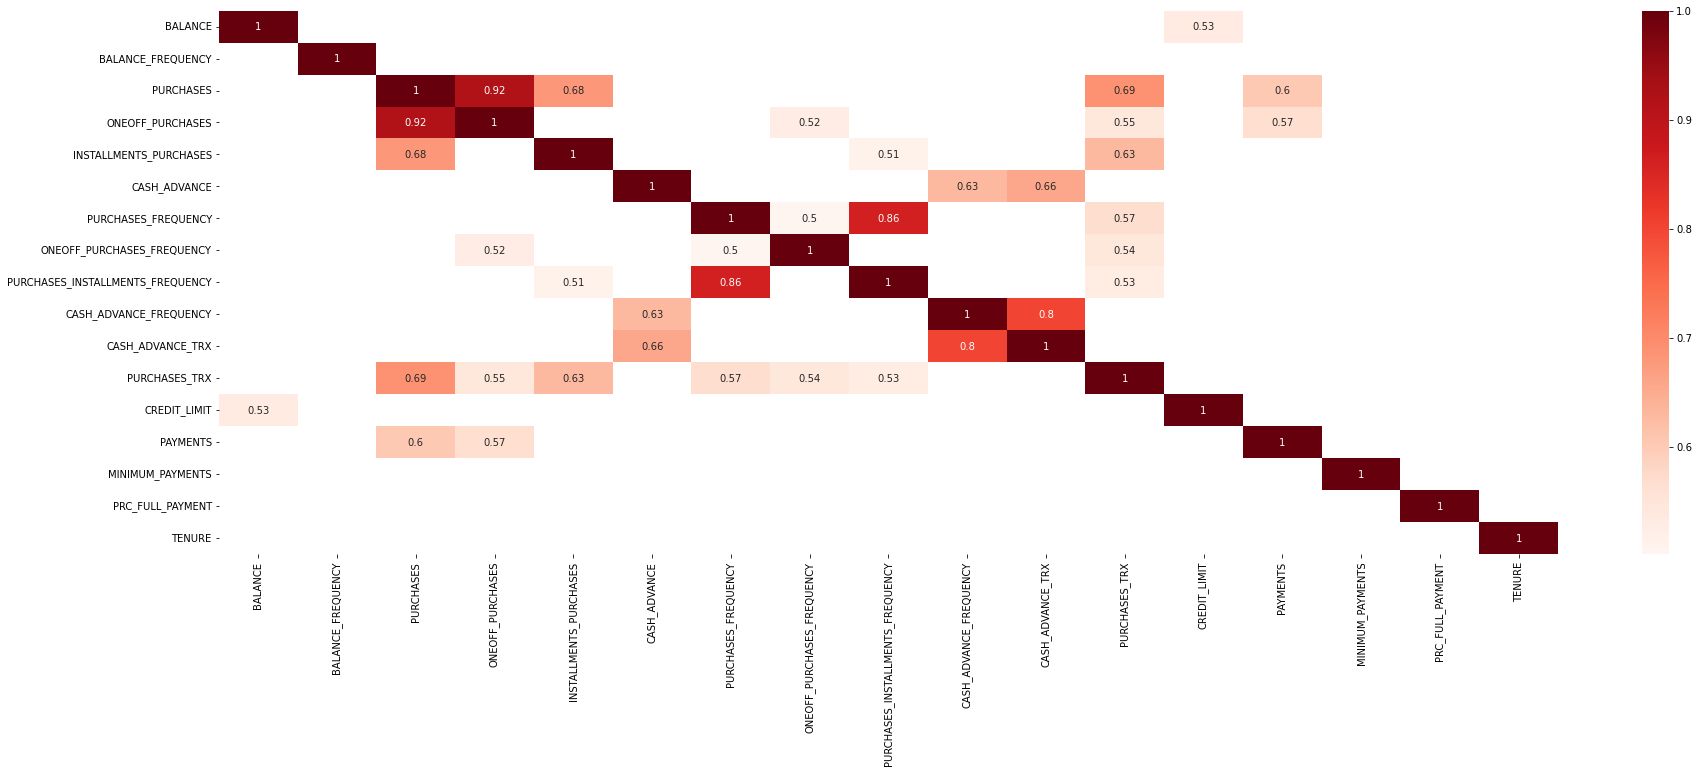

In [8]:
cc_corr = cc_holders.corr()

cc_corr_filt = cc_corr[((cc_corr >= .5) | (cc_corr <= -.5))]
plt.figure(figsize=(30,10))
sns.heatmap(cc_corr_filt, annot=True, cmap="Reds")
plt.show()

What do you observe? What conclusions can you draw from looking at the correlations, and how would that influence a principal components analysis routine? Why do we do Principal Components Analysis?

Ans: From the heatmap, we may know that some columns have a relatively high correlation. For example, the corrlation between "PURCHASES" and "ONEOFF_PURCHASES" is 0.92, implying that they are almostly linear. In that case, we need to use PCA to do the demension reduction and solve the potential collinearity problems.

We may find that for those columns with a higher correlation, it's easier to find them to be the components of the first several principal component vectors. For either objective, it can be shown that the principal components are eigenvectors of the data's covariance matrix. 

For this problem, we need to do PCA to reduce demension and solve tyhe collineraity problem. PCA also helps us to find the proper pattern of data when we're using the k-means clustering algo, because for highly correlated dataset 

2.8 Examine the discrete distributions of each feature column

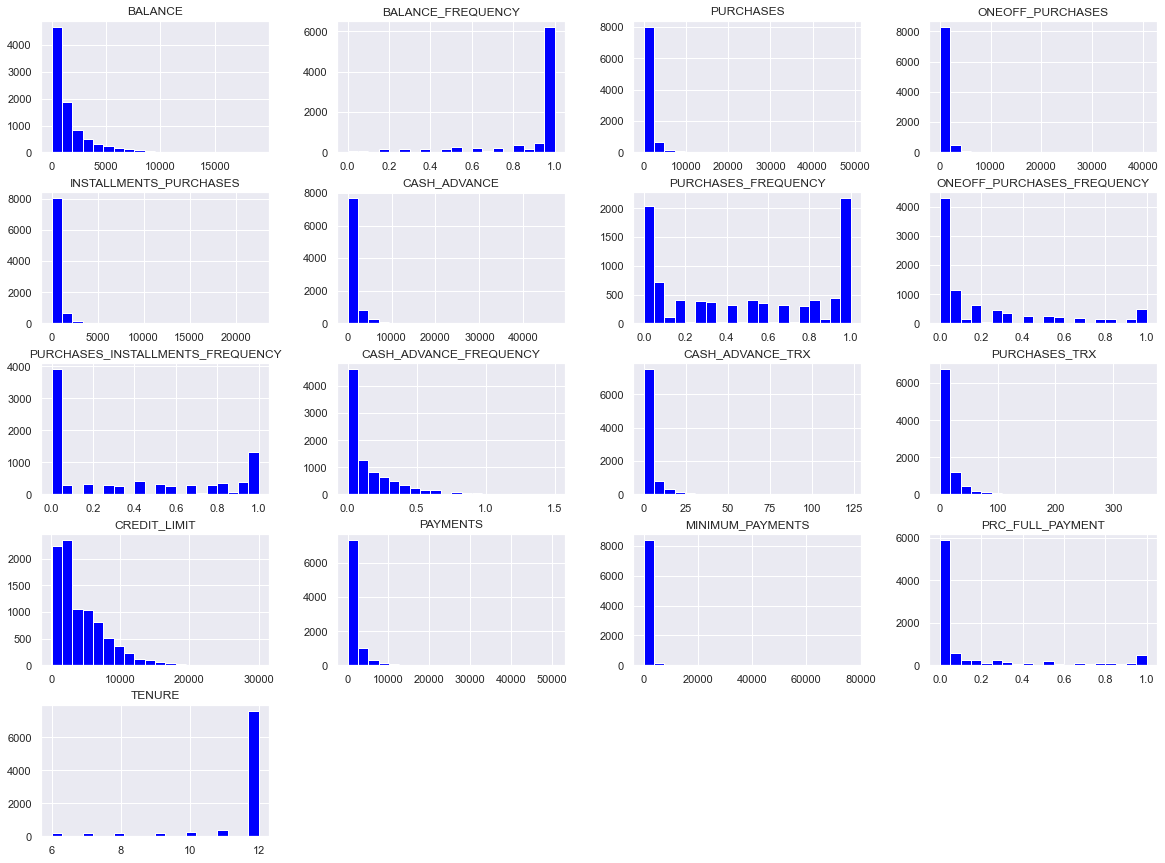

In [9]:
sns.set(rc={'figure.figsize':(20, 15)})
dists = cc_holders.hist(bins=20, color='blue')

What can you conclude about the distributions of the variables in the data set? In 3-4 sentences, describe methods of handling outliers following the lecture notes.

2.9
The data points of many columns are distributed densely on the min or max side. Also, the scales of different columns vary. Possible methods for handling outliers are:
1 chop them off or ignore them (not a good idea though)
2 scale the data
3 clipping
4 binning3

2.10 Examine the data set for missing values

In [10]:
cc_holders.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

2.11 Is it reasonable to fill missing values with the median? If so, fill the missing values with the median.

In [11]:
cc_holders['MINIMUM_PAYMENTS'].fillna(cc_holders['MINIMUM_PAYMENTS'].median(), inplace = True)

In [12]:
cc_holders['CREDIT_LIMIT'].fillna(cc_holders['CREDIT_LIMIT'].median(), inplace = True)

2.12 Check if there are any missing values left

In [13]:
cc_holders.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

2.13 Drop the CUST_ID column. And why do we do so?

The CUST_ID column doesn't contain any training information. It's the ID that we use as an index.

In [14]:
cc_holders.drop('CUST_ID', axis = 1, inplace = True)

2.14 Using the standard scaler, scale the data. Again, why do we do so?

The PCA algo is very sensitive to the scale of data. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled.

In [15]:
scaler = StandardScaler()
# cc_holders.info()
scaler.fit(cc_holders)
cc_holders = scaler.transform(cc_holders)

2.15 By doing PCA, naturally, we can explain more variance if we allow more components. 

Plot the explained variance over the number of components and decide on a reasonable number of components.

Text(0, 0.5, 'explained variance')

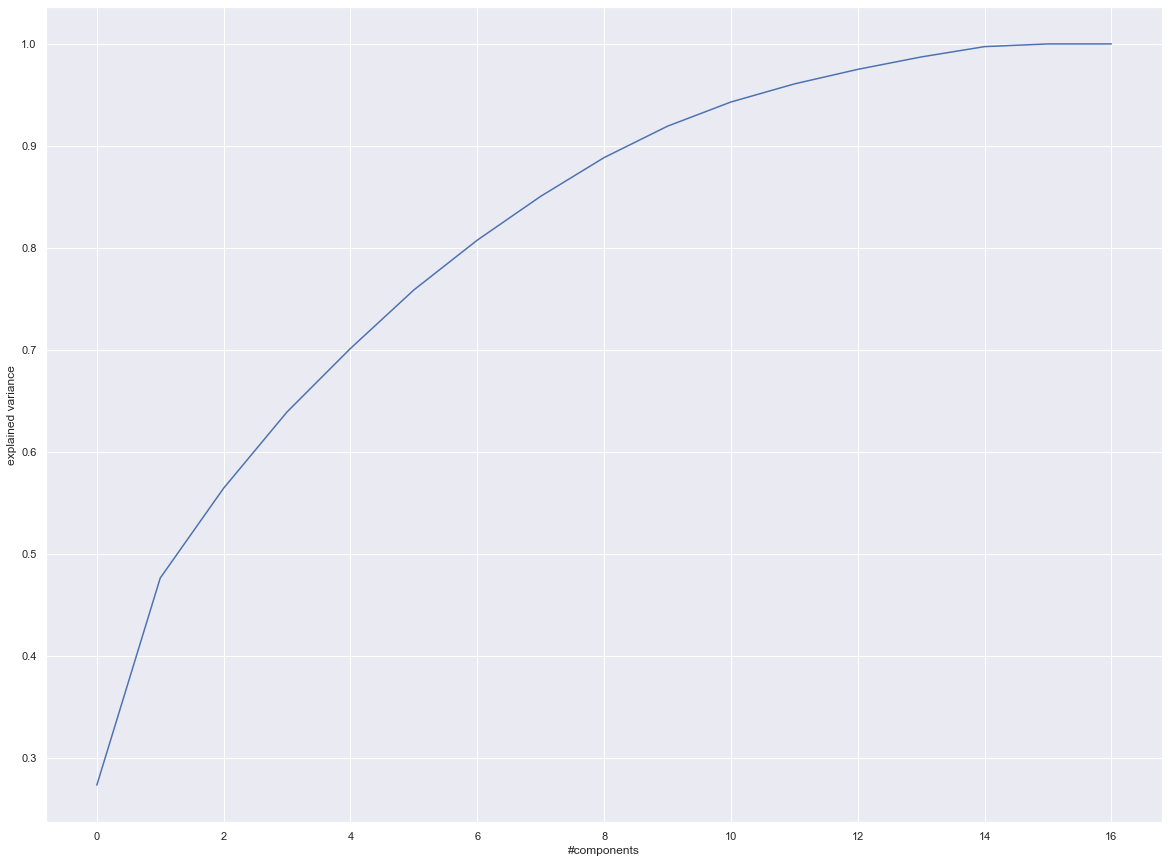

In [19]:
components = cc_holders.shape[1]
pca1 = PCA(n_components=components)
pca1.fit(cc_holders)
explained_variance = pca1.explained_variance_ratio_
num = range(17)
ev_list = []
ev_list.append(pca1.explained_variance_ratio_[0])
for i in num:
    if i == 16:
        break
    ev_list.append(ev_list[i] + pca1.explained_variance_ratio_[i + 1])
p = sns.lineplot(x = num,y = ev_list)
p.set_xlabel("#components", fontsize = 12)
p.set_ylabel("explained variance", fontsize = 12)

2.16 Perform PCA with your chosen number of components and print out the explained variances by each component. When looking back at our EDA, why do we need so many components?

In [20]:
optimal = 10
pca2 = PCA(n_components=optimal)
pca2.fit(cc_holders)
print(pca2.explained_variance_ratio_)

[0.27297671 0.2031378  0.08813182 0.07479524 0.06224729 0.05740056
 0.04883426 0.04299203 0.03798259 0.03080002]


2.17 Plot the observations following PC1 and PC2

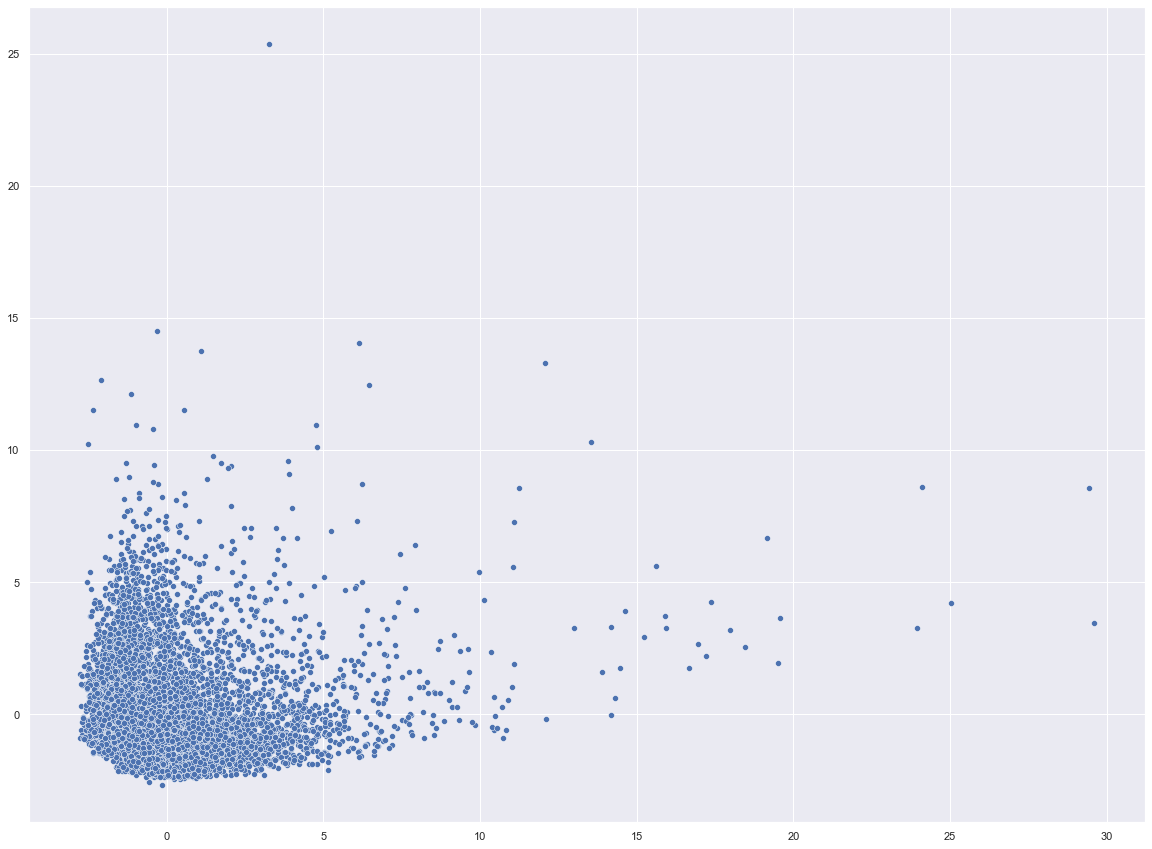

In [21]:
PC = pca2.transform(cc_holders)
PC1 = PC[:,0]
PC2 = PC[:,1]
p = sns.scatterplot(x = PC1,y = PC2)

2.18 You have learnt in class, that a well-known measure to find a good number of clusters is Inertia. Following the lecture notes, plot the inertia graph for 1-19 clusters

In [22]:
cluster_list = []
num_cluster = range(1,20)
for i in range(19):
    n_cluster = i + 1
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, max_iter = 4000, tol = 1e-8).fit(PC)
    cluster_list.append(kmeans.inertia_)

<AxesSubplot:>

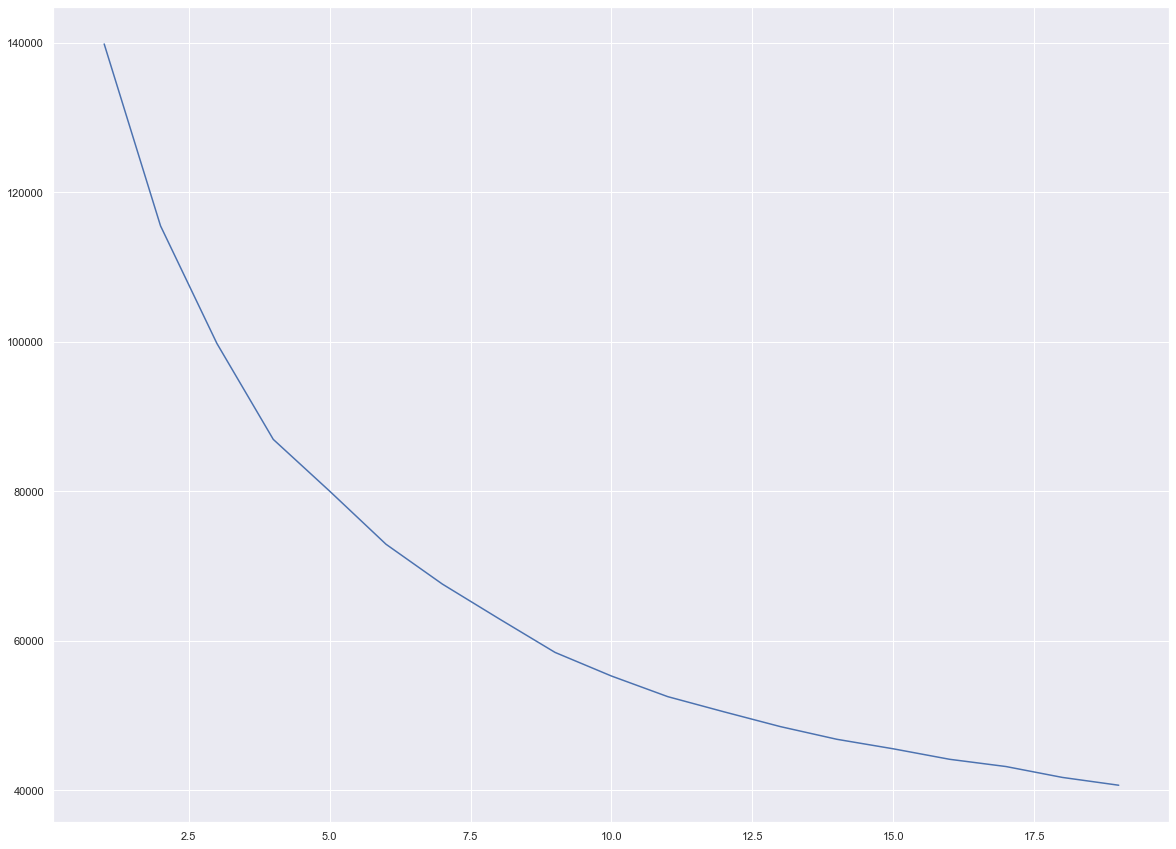

In [23]:
sns.lineplot(x = num_cluster,y = cluster_list)

2.19 Using inertia, we have found the right number of clusters for our use case. Now fit the model and plot the outcome.

In [24]:
optimal_cluster_num = 7

In [26]:
kmeans = KMeans(n_clusters=optimal_cluster_num, random_state = 0, max_iter = 4000, tol = 1e-8).fit(PC)

In [27]:
print(kmeans.labels_)

[5 6 4 ... 0 0 0]


<AxesSubplot:xlabel='X', ylabel='Y'>

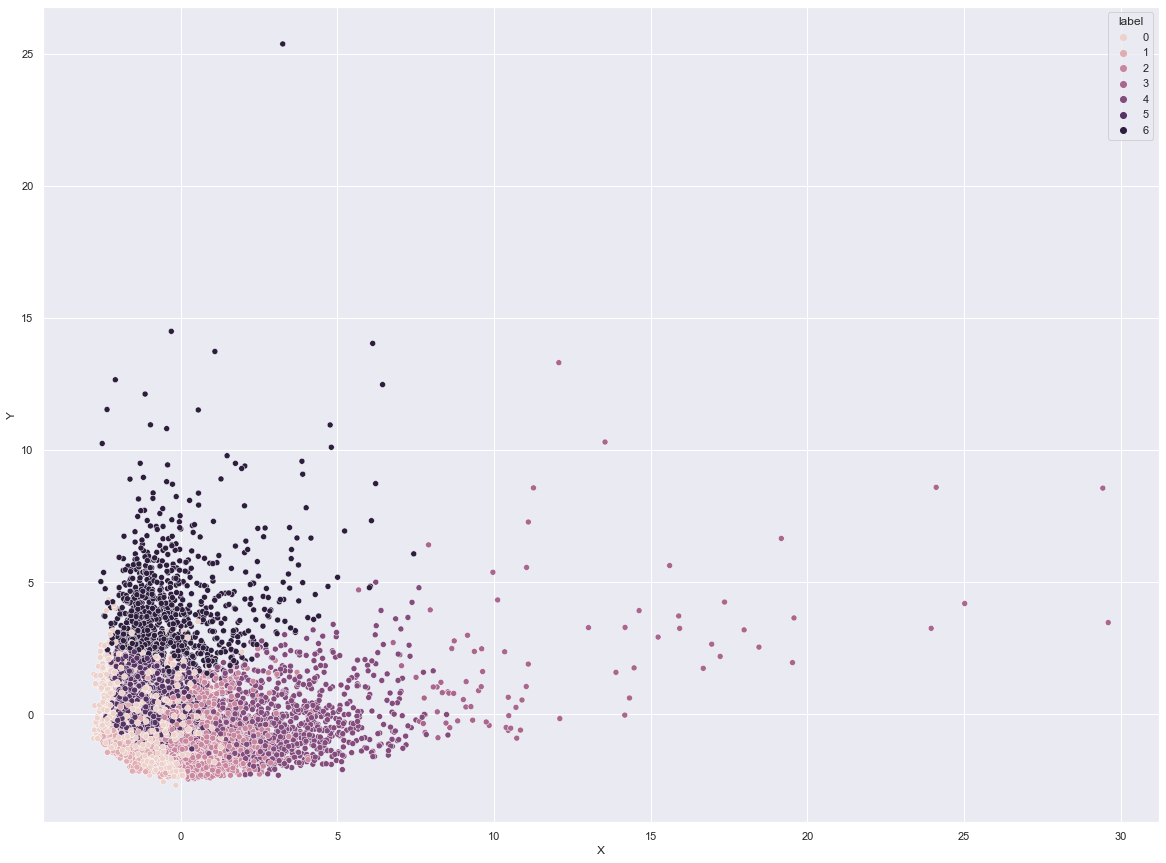

In [28]:
d = {'X': PC1, 'Y': PC2, 'label': kmeans.labels_}
d = pd.DataFrame(d)
sns.scatterplot(x = 'X', y = 'Y', hue = 'label', data = d)

# 3. Your individual project proposal

Please follow the **FRAMING THE ML PROBLEM** workflow as discussed in Lecture 2

**GOAL OF THE PROJECT**

Our problem is best framed as the combination of a binary classification and a unidimensional regression, which predicts the t to (t+1) trend of cryptocurrencies returns (rise or fall) and to be more precise, the exact (t+1)th returns of cryptocurrencies. With an effective prediction of prices, we may build a portfolio of accessible cryptocurrencies and maximize the expected return of our portfolio. In this process, we may use model selection methods to choose the ML models that make the best prediction. As an extension, we may also use ML algos to formulate the best asset allocation strategy.

**DATA SOURCES AND DATA DESIGN**

We use data from FRED and Blockchain.com ranging from the initial creation date of bitcoins to Mar 21st, 2022. Regarding FRED, our data set includes daily (minutely if possible) marco indices such as oil, gold and dollar index etc. Regarding Blockchain.com, our data set includes the same level of cryptocurrency indices such as bitcoin returns, transaction volumes, miner powers and mempools and etc. Generally, we may gain around 5,000 labeled daily data or 7,200,000 labeled minute data. Possible endogenuity problems should be avoided.

**DATA PIPELINES AND EASILY OBTAINED INPUTS**

Both FRED and Blockchain.com provide Python APIs for developers. The constrction of automatic data collection should not be a hard thing. Apart from that, they both offer easily downloaded CSV files that can help us build a prototype for this problem. We take the initiative to first use CSV files to test the model and then iterate to a more complete model with automatic APIs.

**POTENTIAL BIASES**

1 The training data size might limit our choice of useable ML models. If we can only obtain daily datacdue to access constraints, we may not be able to use some deep learning algos that require a relatively large sample size.

2 The labels are too noisy. One thing we should be aware of is that, there might be (should be in theory) white noises in the transaction data of financial markets.

3 Missing Values. Bitcoins and most cryptocurrencies are traded everyday (365 days per year) but, for other assets, they are traded only on transcation days (252 days per year). Besides, some labels are not documented in the earlier days of bitcoin creation. All of these issues bring about possible missing value concerns to this project.

4 Colinearlity problems. There should be some endogenous relations among our labels. We may consider use PCA to do the demension reduction.

**Conclusion**

Our ultimate goal is to build a strategy that can help us make money in the cryptocurrency market. To do this, we need input data from FRED and blockchain.com to predict the future return of cryptocurrencies. We also use ML algos to complete the asset allocation process to maximize returns and to avoid potential biases in the data sets.